This project aims to perform image classification on at least one dataset of facial images to detect the emotional state of the individual in the image.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import datasets, layers, models
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential, load_model, Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers.merge import concatenate

import os

from PIL import Image

import random

In [35]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.Collecting split-folders



## How to Upload the Data

In [37]:
# import splitfolders
# splitfolders.ratio('data', output='output', seed=11037, ratio=(0.8, 0.1, 0.1))

In [38]:
train_dir = 'data/train'
test_dir = 'data/test'
val_dir = 'data/val'

train_generator = ImageDataGenerator().flow_from_directory(train_dir, target_size=(48, 48), batch_size=25832)

test_generator = ImageDataGenerator().flow_from_directory(test_dir, target_size=(48, 48), batch_size=7178)

val_generator = ImageDataGenerator().flow_from_directory(val_dir, target_size=(48, 48), batch_size=2877)

Found 25832 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 2877 images belonging to 7 classes.


In [39]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

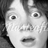

In [41]:
array_to_img(train_images[0])

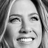

In [42]:
array_to_img(train_images[5])

In [40]:
arrays = [train_images, train_labels, test_images, test_labels, val_images, val_labels]

for array in arrays:
    print(np.shape(array))

(25832, 48, 48, 3)
(25832, 7)
(7178, 48, 48, 3)
(7178, 7)
(2877, 48, 48, 3)
(2877, 7)


In [13]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [18]:
train_generator.class_indices

{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [53]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

In [54]:
test_img.shape

(7178, 6912)

In [44]:
train_y = np.reshape(train_labels[:,0], (25832,1))
test_y = np.reshape(test_labels[:,0], (7178,1))
val_y = np.reshape(val_labels[:,0], (2877,1))

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

sample_angry = random.choice(os.listdir(train_dir + "paper"))
image = load_img(train_dir + "paper/" + sample_paper)
ax[0].imshow(image)
ax[0].set_title("Paper")
ax[0].axis("Off")

### Another Way to Upload the Data

In [27]:
base_dir = os.path.join("data/")

# Train set
train_dir = os.path.join(base_dir + "train/")
print("Train set --> ", os.listdir(train_dir))

# Test set
test_dir = os.path.join(base_dir + "test/")
print("Test set --> ", os.listdir(test_dir))

Train set -->  ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
Test set -->  ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


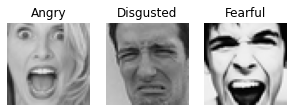

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(5, 3))

sample_angry = random.choice(os.listdir(train_dir + "angry"))
image = load_img(train_dir + "angry/" + sample_angry)
ax[0].imshow(image)
ax[0].set_title("Angry")
ax[0].axis("Off")

sample_disgusted = random.choice(os.listdir(train_dir + "disgusted"))
image = load_img(train_dir + "disgusted/" + sample_disgusted)
ax[1].imshow(image)
ax[1].set_title("Disgusted")
ax[1].axis("Off")

sample_fearful = random.choice(os.listdir(train_dir + "fearful"))
image = load_img(train_dir + "fearful/" + sample_fearful)
ax[2].imshow(image)
ax[2].set_title("Fearful")
ax[2].axis("Off")

plt.show()

# Baseline Model

In [46]:
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(6912,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [47]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [48]:
base_model = model.fit(train_img,
                    train_y,
                    epochs=100,
                    batch_size=40,
                    validation_data=(val_img, val_y))#,
                    # callbacks=callbacks)

Epoch 1/100
646/646 [==============================] - 6s 9ms/step - loss: 3.2017 - accuracy: 0.8560 - val_loss: 0.5332 - val_accuracy: 0.8610
Epoch 2/100
646/646 [==============================] - 4s 6ms/step - loss: 0.4888 - accuracy: 0.8608 - val_loss: 0.4546 - val_accuracy: 0.8610
Epoch 3/100
646/646 [==============================] - 4s 6ms/step - loss: 0.4356 - accuracy: 0.8608 - val_loss: 0.4212 - val_accuracy: 0.8610
Epoch 4/100
646/646 [==============================] - 4s 6ms/step - loss: 0.4139 - accuracy: 0.8608 - val_loss: 0.4084 - val_accuracy: 0.8610
Epoch 5/100
646/646 [==============================] - 4s 6ms/step - loss: 0.4062 - accuracy: 0.8608 - val_loss: 0.4044 - val_accuracy: 0.8610
Epoch 6/100
646/646 [==============================] - 4s 6ms/step - loss: 0.4040 - accuracy: 0.8608 - val_loss: 0.4034 - val_accuracy: 0.8610
Epoch 7/100
646/646 [==============================] - 4s 6ms/step - loss: 0.4036 - accuracy: 0.8608 - val_loss: 0.4032 - val_accuracy: 0.8610

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                138260    
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 147       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 138,453
Trainable params: 138,453
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.evaluate(train_img, train_y)

808/808 [==============================] - 19s 23ms/step - loss: 0.4034 - accuracy: 0.8608


[0.40344563126564026, 0.8608314990997314]

In [58]:
model.evaluate(test_img, test_y)

225/225 [==============================] - 5s 24ms/step - loss: 0.3930 - accuracy: 0.8665 0s - loss: 0.3911 - accu


[0.39304864406585693, 0.8665366172790527]